<a href="https://colab.research.google.com/github/Leegyu66/ML-and-DL-beginner/blob/main/Neuron_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

<ipython-input-3-50557eccee5c>:39: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

In [6]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)


In [7]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-6-322c8a415b51>:45: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9385964912280702

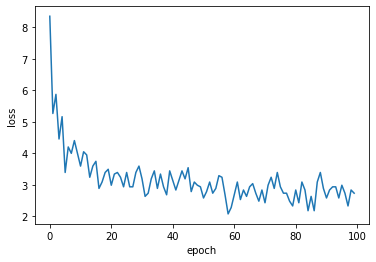

In [9]:
from matplotlib import pyplot as plt

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 사이킷런으로 경사 하강법 적용하기

In [10]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
# 손실함수, 반복 횟수, 손실 값이 1e-3만큼 줄어야지 종료, 랜덤시드

In [11]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

In [12]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

## 여러 가지 경사 하강법
### 확률적 경사 하강법
- 샘플들 중 1개의 샘플을 중복되지 않도록 무작위로 선택 후 그레이디언트를 계산한다
### 배치 경사 하강법
#### 미니 배치 경사 하강법
- 샘플을 몇 개 씩 여러 번 나누어 처리하는 방식이다
#### 배치 경사 하강법
- 샘플을 모두 선택해서 처리하는 방식이다

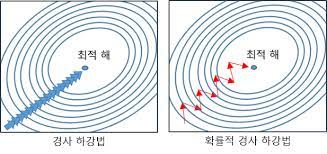

- 확률적 경사 하강법이 배치 경사 하강법에 비해 계산 비용은 덜 든다(1개씩 계산하기 때문)
- 하지만 가중치가 최적값에 수렴하는 과정이 불안하다
- 배치 경사 하강법은 샘플을 모두 처리하기 때문에 가중치가 최적값에 수렴하는 과정이 안정적이다
- 하지만 계산 비용이 많이 든다
- 이러한 장단점을 보완한 방식이 **미니 배치 경사 하강법**이다